## Simple linear regression with automobile data 
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets
import statsmodels.api as sm

%matplotlib inline
sns.set_style('white')

In [12]:
# load dataset
dfcars = pd.read_csv('mtcars.csv')
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [15]:
# split into training and testing set
from sklearn.model_selection import train_test_split
# set random state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.30, random_state=6)

In [16]:
dfcars.shape, traindf.shape, testdf.shape

((32, 12), (22, 12), (10, 12))

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

`hp` and `wt` intuitively seem like reasonable predictors.  For example, heavier cars are likely less fuel efficient.  

> **EXERCISE:** With either sklearn or statsmodels, fit the training data using simple linear regression.  Use the model to make mpg predictions on testing set.  

> Plot the data and the prediction.  

>Print out the mean squared error for the training set and the testing set and compare.

In [20]:
#define  predictor and response for training set
y_train = traindf.mpg
X_train = traindf[['wt']]

#define  predictor and response for testing set
y_test = testdf.mpg
X_test = testdf[['wt']]

In [22]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f"Coefficients: \n {lr.coef_[0]} {lr.intercept_}")

Coefficients: 
 -5.252574103908988 37.77785841313509


Text(0, 0.5, 'mpg')

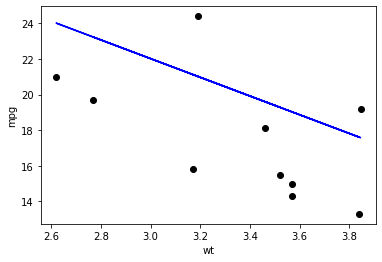

In [23]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue")
plt.xlabel('wt')
plt.ylabel('mpg')

In [26]:
train_MSE2 = np.mean((y_train - lr.predict(X_train))**2)
test_MSE2 = np.mean((y_test - lr.predict(X_test))**2)
print(f"The training MSE is {train_MSE2}, the testing MSE is {test_MSE2}")


The training MSE is 7.308504114538133, the testing MSE is 13.767533827646005


In [27]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, lr.predict(X_train)))
print(mean_squared_error(y_test, lr.predict(X_test)))

7.308504114538135
13.767533827646002


We see that the training MSE is lower than the testing MSE.  This makes sense since we expect the model to be a better fit for the training data (since we trained with it!) than the testing data set.

## Multiple linear regression with automobile data 

> **EXERCISE:** With either sklearn or statsmodels, fit the training data using multiple linear regression with two predictors.  Use the model to make mpg predictions on testing set.  Print out the mean squared error for the training set and the testing set and compare.  

>How do these training and testing mean squared errors compare to those from the simple linear regression?

>Time permitting, repeat the training and testing with three predictors and calculate the mean squared errors.  How do these compare to the errors from the one and two predictor models?

In [30]:
X_train2 = traindf[['wt','hp']]
X_test2 = testdf[['wt','hp']]

lr2 = linear_model.LinearRegression()

lr2.fit(X_train2, y_train)

y_pred2 = lr2.predict(X_test2)

print(f"Coefficients: \n {lr2.coef_[0]} {lr2.intercept_} ")

Coefficients: 
 -3.8858540380101565 37.65626136757216 


In [35]:
train_MSE2 = np.mean((y_train - lr2.predict(X_train2))**2)
test_MSE2 = np.mean((y_test - lr2.predict(X_test2))**2)

print(f"The training MSE is {train_MSE2}, the testing MSE is {test_MSE2}")

The training MSE is 6.869722562770147, the testing MSE is 4.659417453818483


In [36]:
print(mean_squared_error(y_train, lr2.predict(X_train2)))
print(mean_squared_error(y_test, lr2.predict(X_test2)))

6.869722562770146
4.659417453818483


In [41]:
#using Stats Models
y = y_train
X = x_train
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  const    37.777858
wt       -5.252574
dtype: float64
R2:  0.8269577421574658


We observe that both the training MSE and testing MSE are lower than the corresponding training and testing MSEs when we had one predictor.  So it seems that we'd prefer our model with two predictors than one predictor.  

But we observe that with the two predictor model the training MSE is larger than the testing MSE.  It is possible for the training MSE to be higher than the testing MSE.  This will be discussed more in lecture.  One possibility is that the test set was too small, so that the model by chance fit it better than the training set.  Can you think of other reasons?
